# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

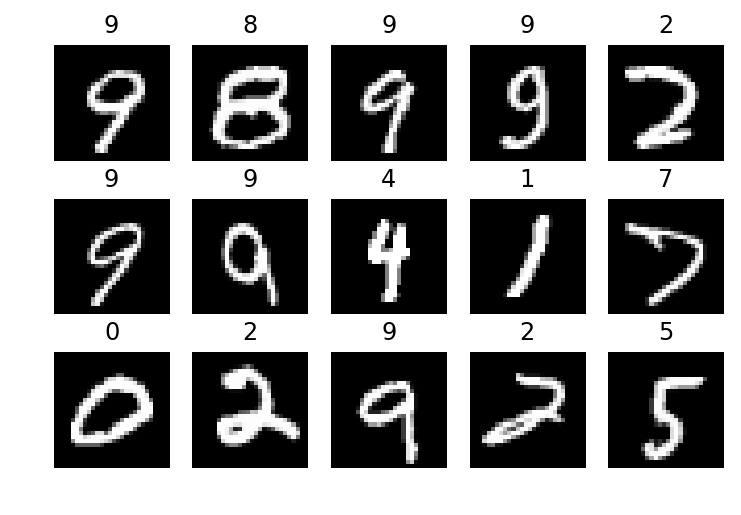

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        n = random.randint(1,5)
        #print(n)
        for j in range(n):
            index = random.randint(0, 10)
            X_gen[i,:, j*width:(j+1)*width, 0] = X_raw[index]
            y_gen[j][i,y_raw[index]] = 1
        for j in range(n, 5):
            y_gen[j][i,10] = 1
    
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=233)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
#print ("X_train:", X_train.shape, "y_train:", len(y_train))
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

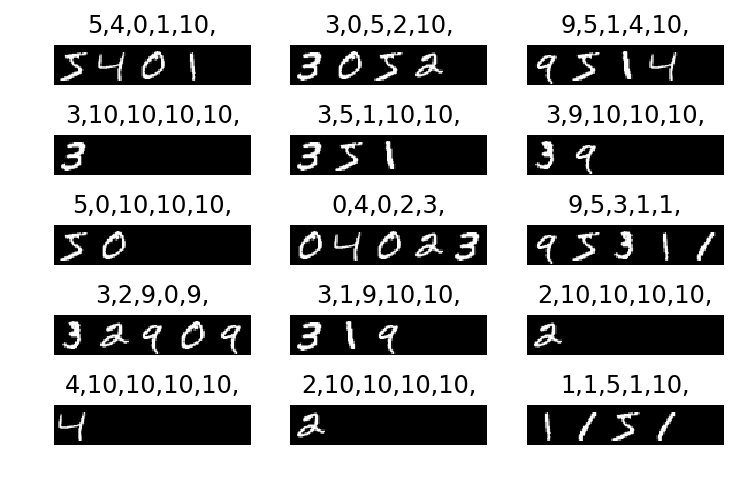

In [4]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**
先选取1~5的随机数$n$决定数字的长度，再分别选取$n$个数字填充前$n$张图片，用0填充剩下的位置；
划分训练集和测试集用的是留出法，会将数据划分为两个互斥的集合，我们在训练集上训练数据，在测试集上验证泛化误差，由此我们就能知道模型是否过拟合，或是欠拟合；验证集则能在每一次epoch对模型进行评估，在很大程度上能够作为模型每次epoch泛化能力评估的参考。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [5]:
from keras.models import Model
from keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
import keras

        
# TODO: 构建你的模型
input_layer = Input(shape=(28, 140, 1))
conv1 = Conv2D(32, (5,5), strides=(1,1), padding='valid', activation='relu')(input_layer)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2) 
fc0 = Flatten()(conv2)
fc1 = Dense(120)(fc0)
fc1 = Activation('tanh')(fc1)
fc2 = Dense(84)(fc1)
fc2 = Activation('tanh')(fc2)
logits = [Dense(11, activation='softmax')(fc2) for i in range(n_len)]
model = Model(inputs=input_layer, outputs=logits)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

'''
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28*5, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))
'''





"\nmodel = Sequential()\nmodel.add(Conv2D(30, kernel_size=(3, 3),\n                 activation='relu',\n                 input_shape=(28, 28*5, 1)))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(11, activation='softmax'))\n"

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
对于这个问题，我参考了LeNet的结构。如之后的可视化图形所示，我先使用了两个卷积层，每个卷积层都有最大池化，padding都是valid，激活函数使用了relu。在卷积之后将张量flatten作为全连接层的输入然后在经过两个分别有120和84个神经元的全连接层。因为我们的y包含了五个数字，所以到最后连上5个logit作为输出（这和有多个输出的RNN类似，比如seq2seq），每个logit都有11个输出神经元，由于是分类问题需要输出概率，激活函数为softmax。
优化器我选择了有adaptive learning rate的Adadelta，由于是分类问题，所以loss函数使用的是cross entropy。

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

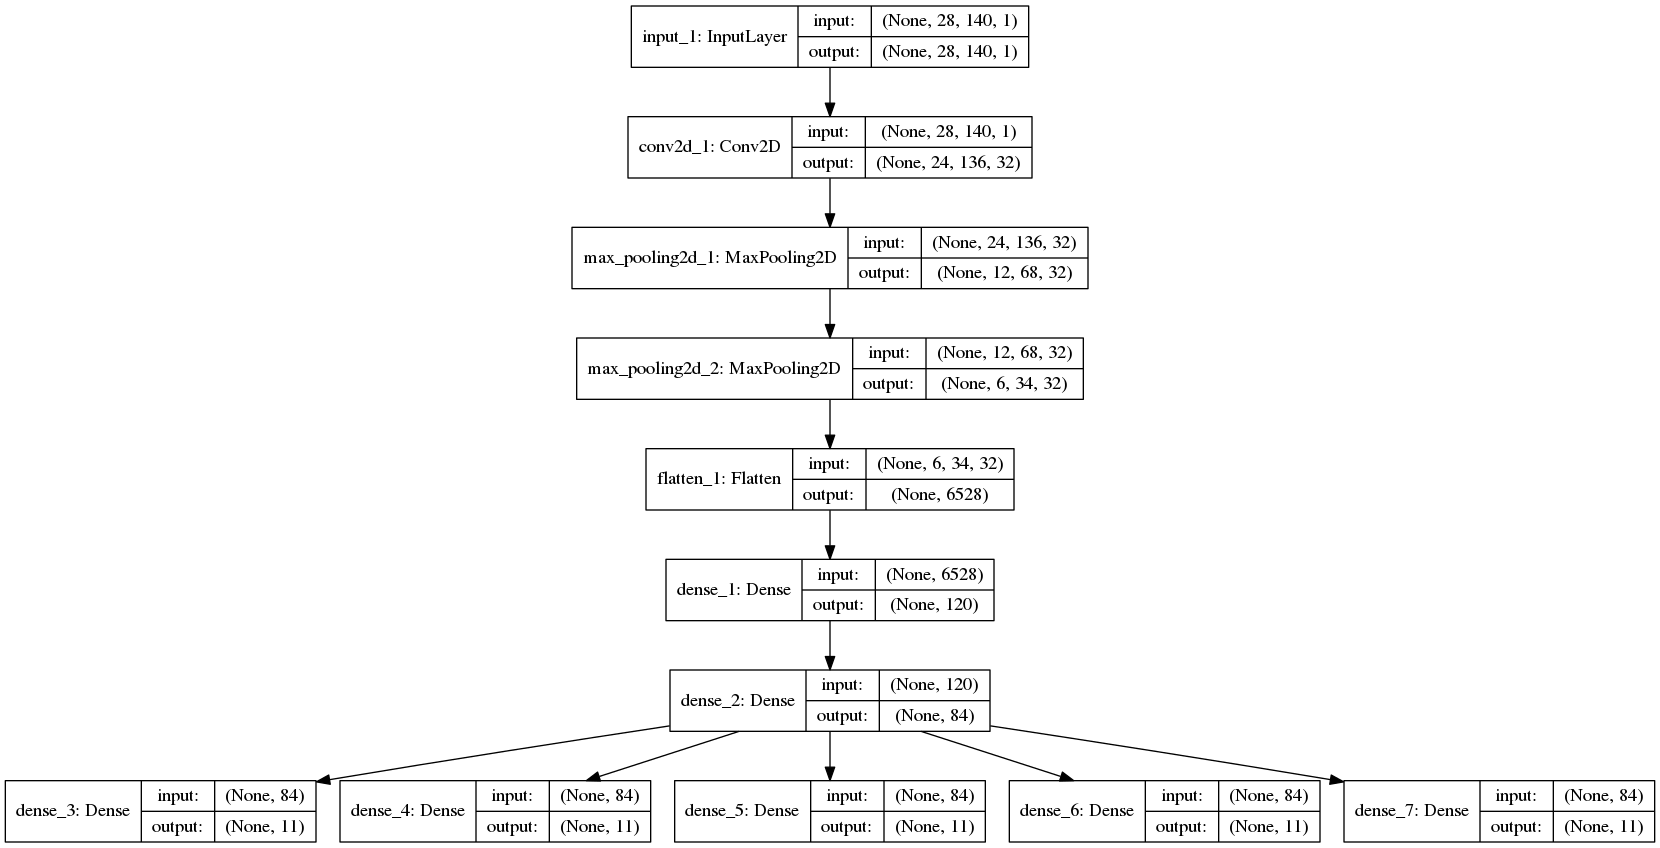

In [6]:
from keras.utils.vis_utils import plot_model, model_to_dot

from IPython.display import Image, SVG

# TODO: 可视化你的模型
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png', show_shapes=True)
Image(filename = 'train_model.png')

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：** 我的模型拥有两层卷积层（每层都有max pooling）和三层全连接层，其中输出层由5个logits组成，每个logits有11个神经元（因为有11个类），通过softmax函数进行输出。在卷积完成后flatten张量，作为全连接层的输入。整个网络的逻辑就是，卷积层来extract features，全连接层来分类。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [7]:
# TODO: 训练你的模型
import keras
        
model.fit(X_train, [y for y in y_train],batch_size=128, validation_split=0.2, epochs=8, verbose=1)


Train on 38400 samples, validate on 9600 samples
Epoch 1/8
38400/38400 [==============================] - 10s - loss: 2.8455 - dense_3_loss: 0.6509 - dense_4_loss: 0.6275 - dense_5_loss: 0.6012 - dense_6_loss: 0.5510 - dense_7_loss: 0.4148 - dense_3_acc: 0.8632 - dense_4_acc: 0.8814 - dense_5_acc: 0.8795 - dense_6_acc: 0.8809 - dense_7_acc: 0.9020 - val_loss: 0.9617 - val_dense_3_loss: 0.1848 - val_dense_4_loss: 0.1860 - val_dense_5_loss: 0.2011 - val_dense_6_loss: 0.2053 - val_dense_7_loss: 0.1846 - val_dense_3_acc: 0.9907 - val_dense_4_acc: 0.9941 - val_dense_5_acc: 0.9932 - val_dense_6_acc: 0.9916 - val_dense_7_acc: 0.9831
Epoch 2/8
38400/38400 [==============================] - 8s - loss: 0.5443 - dense_3_loss: 0.1045 - dense_4_loss: 0.1091 - dense_5_loss: 0.1094 - dense_6_loss: 0.1156 - dense_7_loss: 0.1058 - dense_3_acc: 0.9978 - dense_4_acc: 0.9972 - dense_5_acc: 0.9986 - dense_6_acc: 0.9967 - dense_7_acc: 0.9948 - val_loss: 0.2559 - val_dense_3_loss: 0.0491 - val_dense_4_loss: 

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [8]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    
    score = model.evaluate(X_test, y_test, verbose=1)
    #print('Test loss:', score[0])
    print('Test accuracy:', score[6:10])
evaluate(model)

10000/10000 [==============================] - 2s     
('Test accuracy:', [1.0, 1.0, 1.0, 1.0])


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：** 模型对于图片上每一个数字的test acc都是1.0，我认为模型足以解决问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

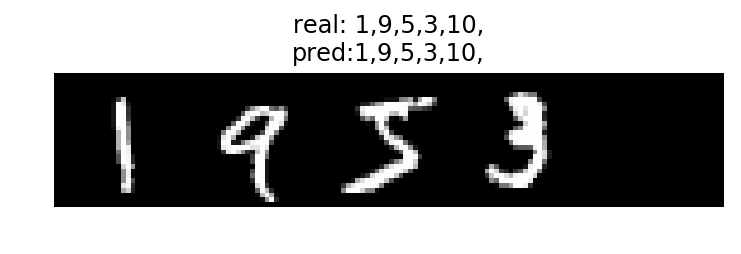

In [20]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型
模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。


In [10]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())